In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [ ]:
import warnings
import joblib

In [ ]:
df = pd.read_csv('HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.shape

(615, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

## Data Cleaning

In [ ]:
## Fill Nulls

df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
print(df['Category'].value_counts())
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})
print(df['Category'].value_counts())

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64
0    540
1     75
Name: Category, dtype: int64


In [ ]:
print(df['Sex'].value_counts())
df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})
print(df['Sex'].value_counts())

m    377
f    238
Name: Sex, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


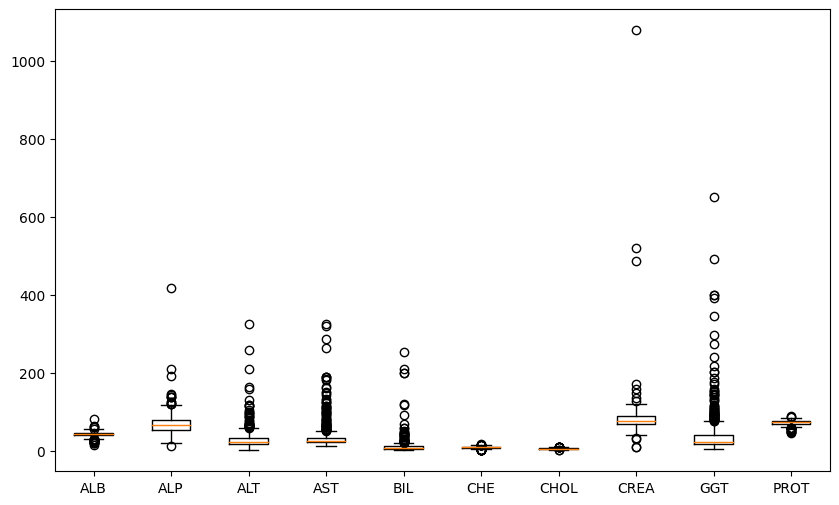

In [ ]:

# create a list of the columns to plot
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(10,6))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
# plt.xticks(rotation=45)
plt.show()


In [ ]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


In [ ]:
# This scaler removes the median and scales the data according to the interquartile range, making it less sensitive to outliers compared to StandardScaler.
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Define the columns to be scaled using RobustScaler
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Scale the selected columns using RobustScaler
df[cols_to_scale] = robust_scaler.fit_transform(df[cols_to_scale])


In [ ]:
# Calculate the 1st percentile (1% quantile) of the specified column
q_low = df[col].quantile(0.01)

# Calculate the 99th percentile (99% quantile) of the specified column
q_hi = df[col].quantile(0.99)

# Identify the rows where the values in the specified column are either
# below the 1st percentile or above the 99th percentile, marking them as outliers
df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]

# Calculate the percentage of each column that is made up of outliers
# First, it sums up the outliers for each column, divides by the total number of outliers,
# and then multiplies by 100 to convert the fraction to a percentage
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100

# Print the percentage of outliers for each column
print(outlier_percentage)


Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


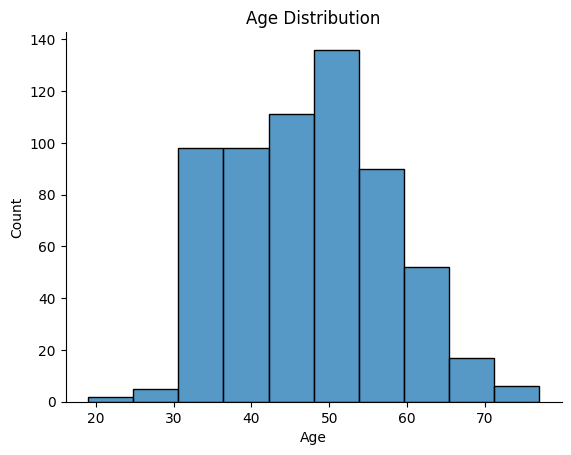

In [ ]:
sns.histplot(df['Age'], bins=10)  
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

sns.despine()

In [ ]:
df['Category'].value_counts()

0    540
1     75
Name: Category, dtype: int64

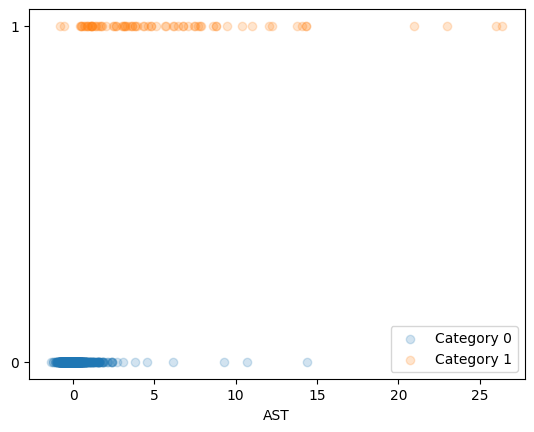

In [ ]:
# filter data by category 0 or 1
df_cat0 = df[df['Category']==0]
df_cat1 = df[df['Category']==1]

# plot the scatter plot for category 0 and 1 separately
plt.scatter(df_cat0['AST'], np.zeros_like(df_cat0['AST']), alpha=0.2, label='Category 0')
plt.scatter(df_cat1['AST'], np.zeros_like(df_cat1['AST'])+1, alpha=0.2, label='Category 1')
plt.xlabel('AST')
plt.yticks([0,1])
plt.legend()
plt.show()

Total Suspected Patients : 540 
Total Healthy Patients : 75 


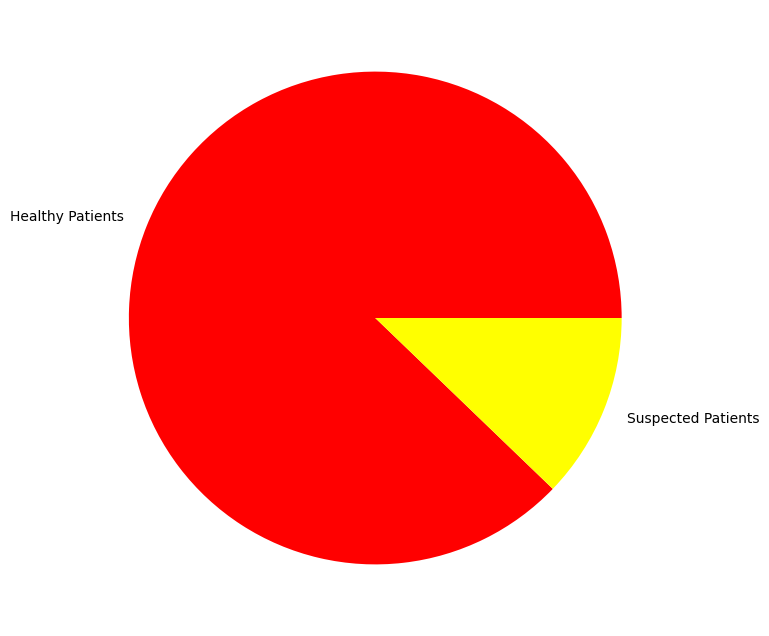

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(), 
        colors=["red","yellow"], 
        labels=["Healthy Patients","Suspected Patients"], 
        )

plt.show()

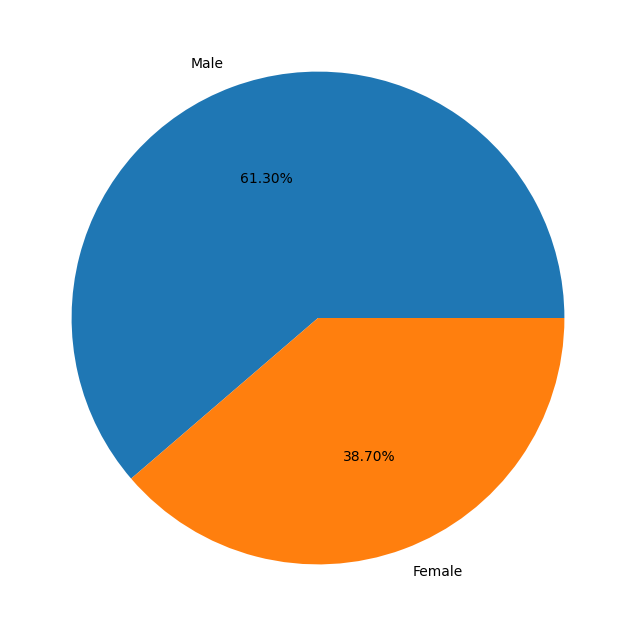

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(), 
       labels=["Male","Female"], 
        autopct="%1.2f%%", 
        )
plt.show()

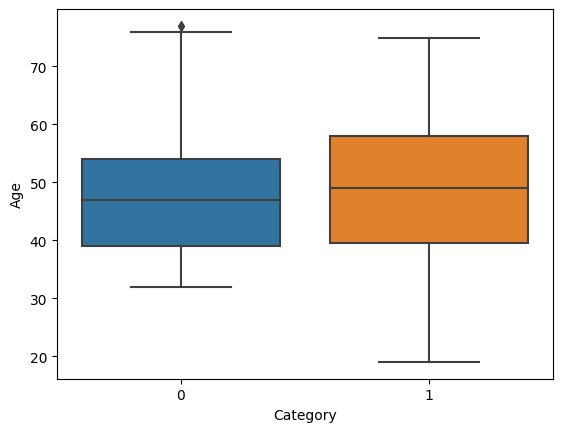

In [ ]:
sns.boxplot(x="Category", y="Age", data=df)
plt.show()

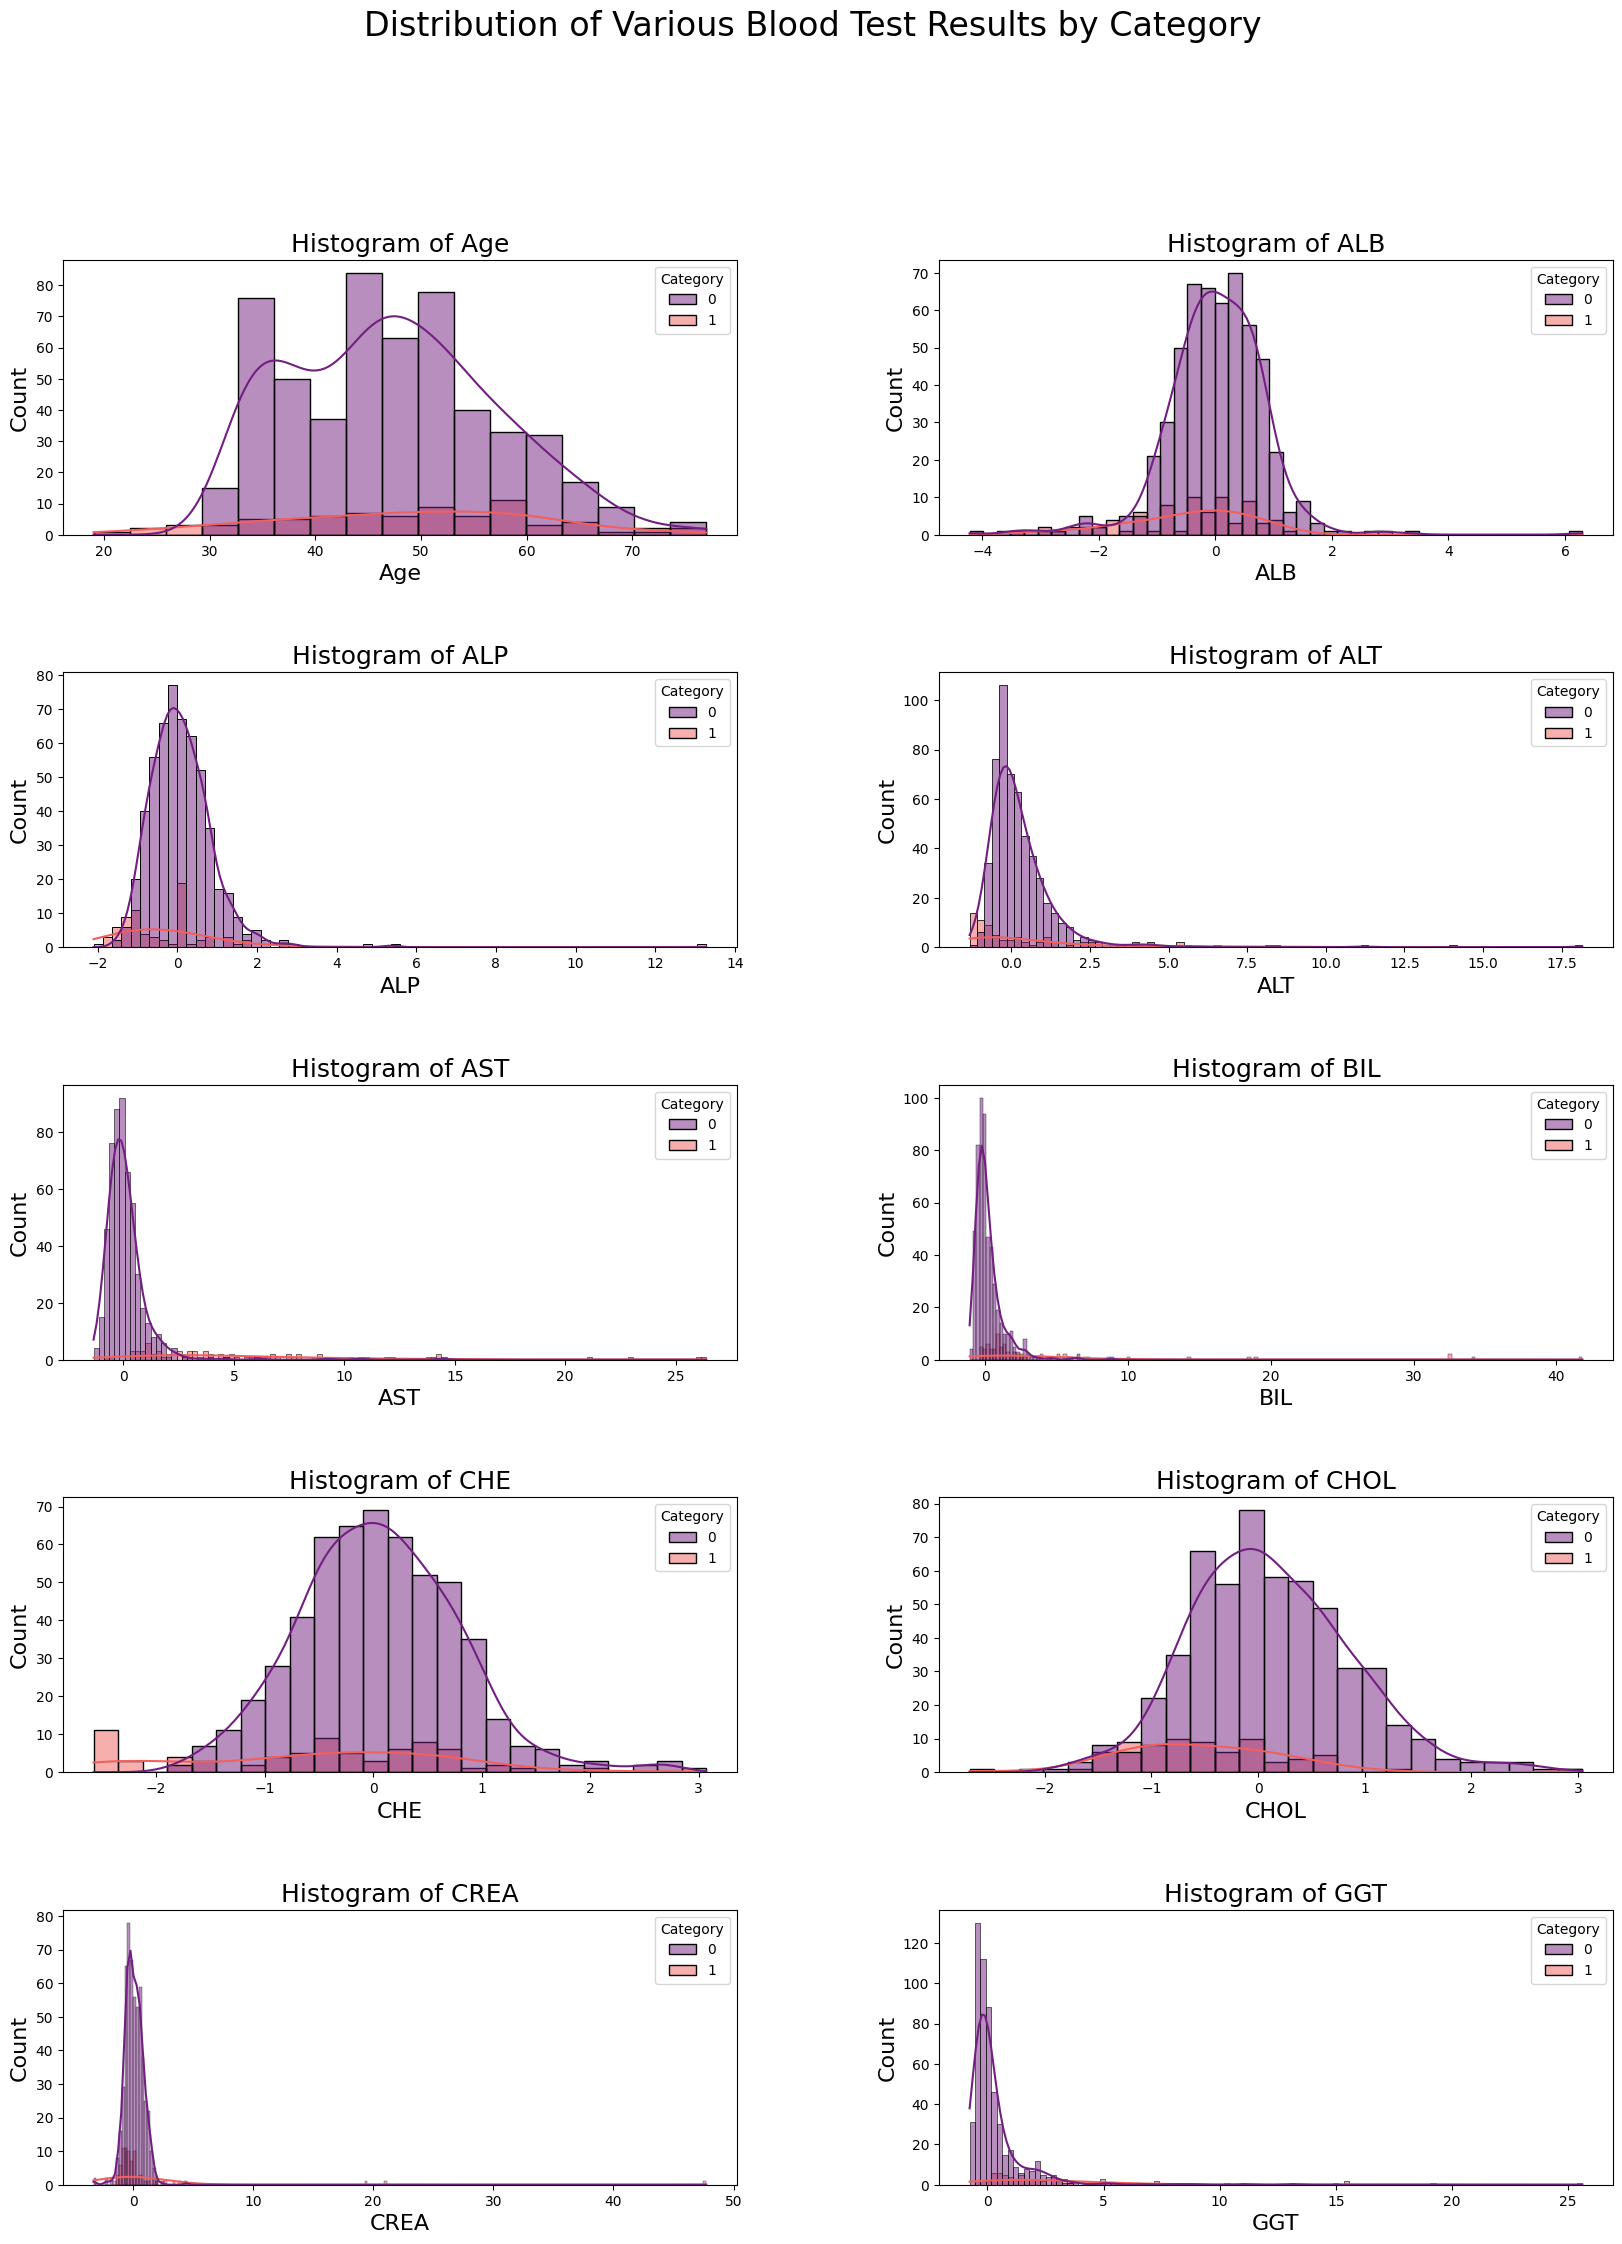

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Define the columns to plot
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Loop over each column and plot a histogram with multiple categories
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # increase x-axis label font size
    axes[i].set_ylabel("Count", fontsize=16)  # increase y-axis label font size
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # increase title font size
    # axes[i].legend(fontsize=14)  # increase legend font size

# Add a main title to the figure
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # add more spacing between subplots



## Model creation

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape, X_test.shape,'\n', y_train.shape, y_test.shape)

(492, 12) (123, 12) 
 (492,) (123,)


## Defining Models and Hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix


## Defining Models and Hyperparameters


In [ ]:
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 20, None]
        }
    },
    {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 10]
        }
    },
    {
        "name": "Support Vector Machine",
        "estimator": SVC(),
        "hyperparameters": {
            "C": [0.01, 0.1, 1, 10],
                        "kernel": ["linear", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]
        }
    }

]

## Training and Tuning Each Model


In [ ]:
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator = model['estimator'],
            param_grid = model['hyperparameters'],
            scoring = 'accuracy',
            cv = 5
        )
        grid_search.fit(X_train, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.9024390243902439
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Accuracy for Random Forest: 0.9349593495934959
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy for Gradient Boosting: 0.9349593495934959
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for Support Vector Machine: 0.9024390243902439


### From Fine Tuning Output

In [ ]:
# create the Logistic Regression model with the best hyperparameters
log_reg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2'
)

# create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=300
)

# create the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100
)

# create the Support Vector Machine model with the best hyperparameters
svm_model = SVC(
    C=10,
    gamma='scale',
    kernel='linear'
)

## Train Models

In [ ]:
# train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# train the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)


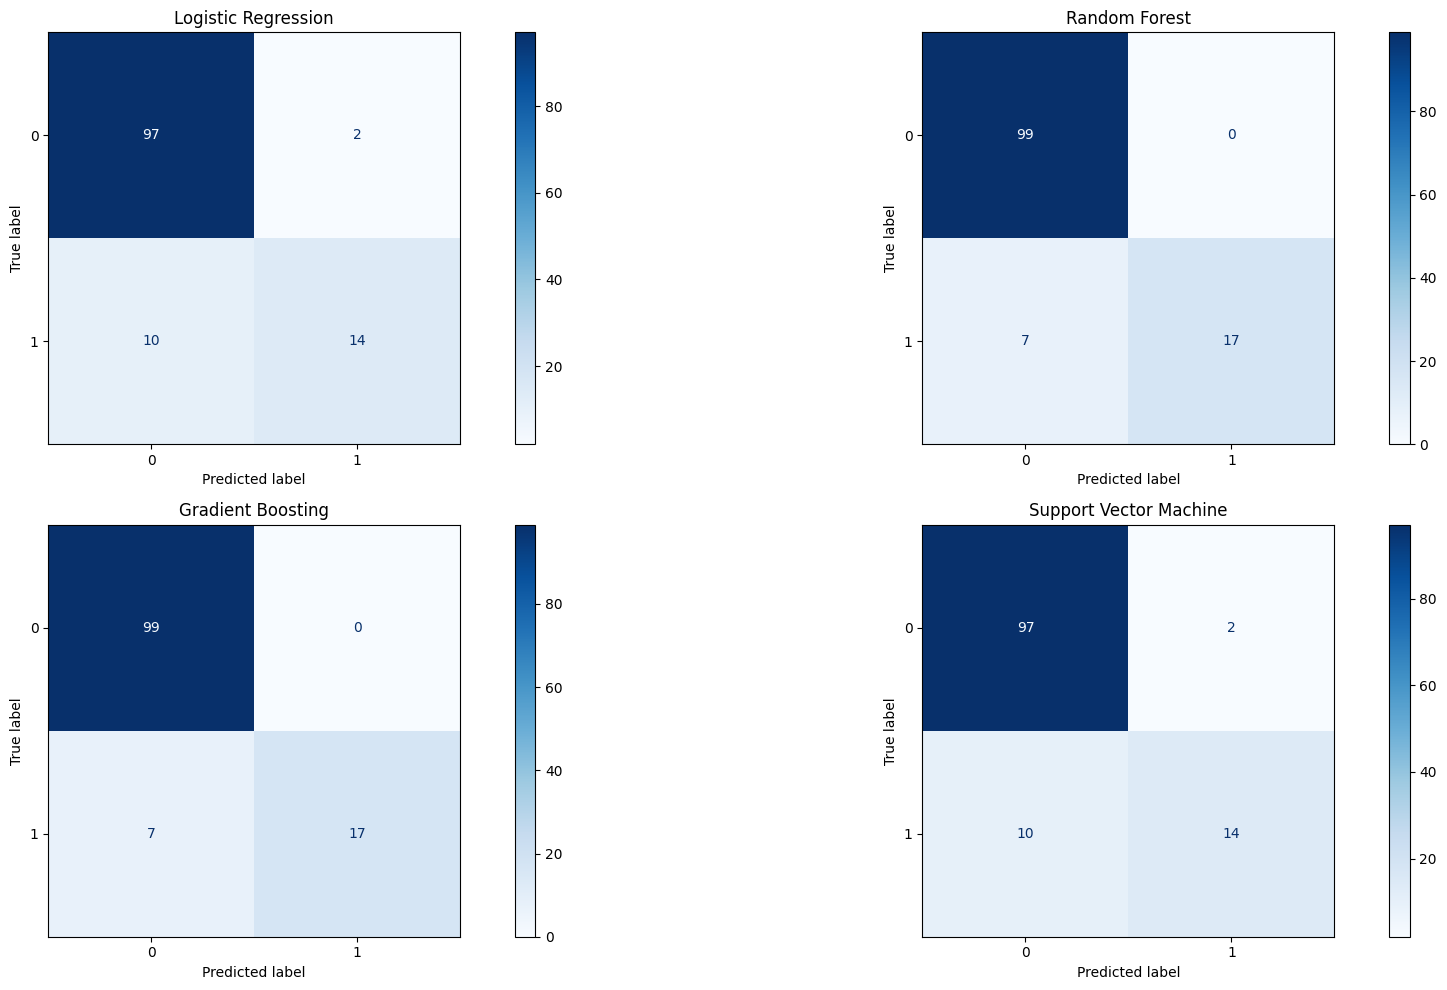

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# define the models and their names
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector Machine': svm_model
}

# create a subplot grid with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    row = i // 2
    col = i % 2
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

plt.tight_layout()
plt.show()


## Compare Accuracy 

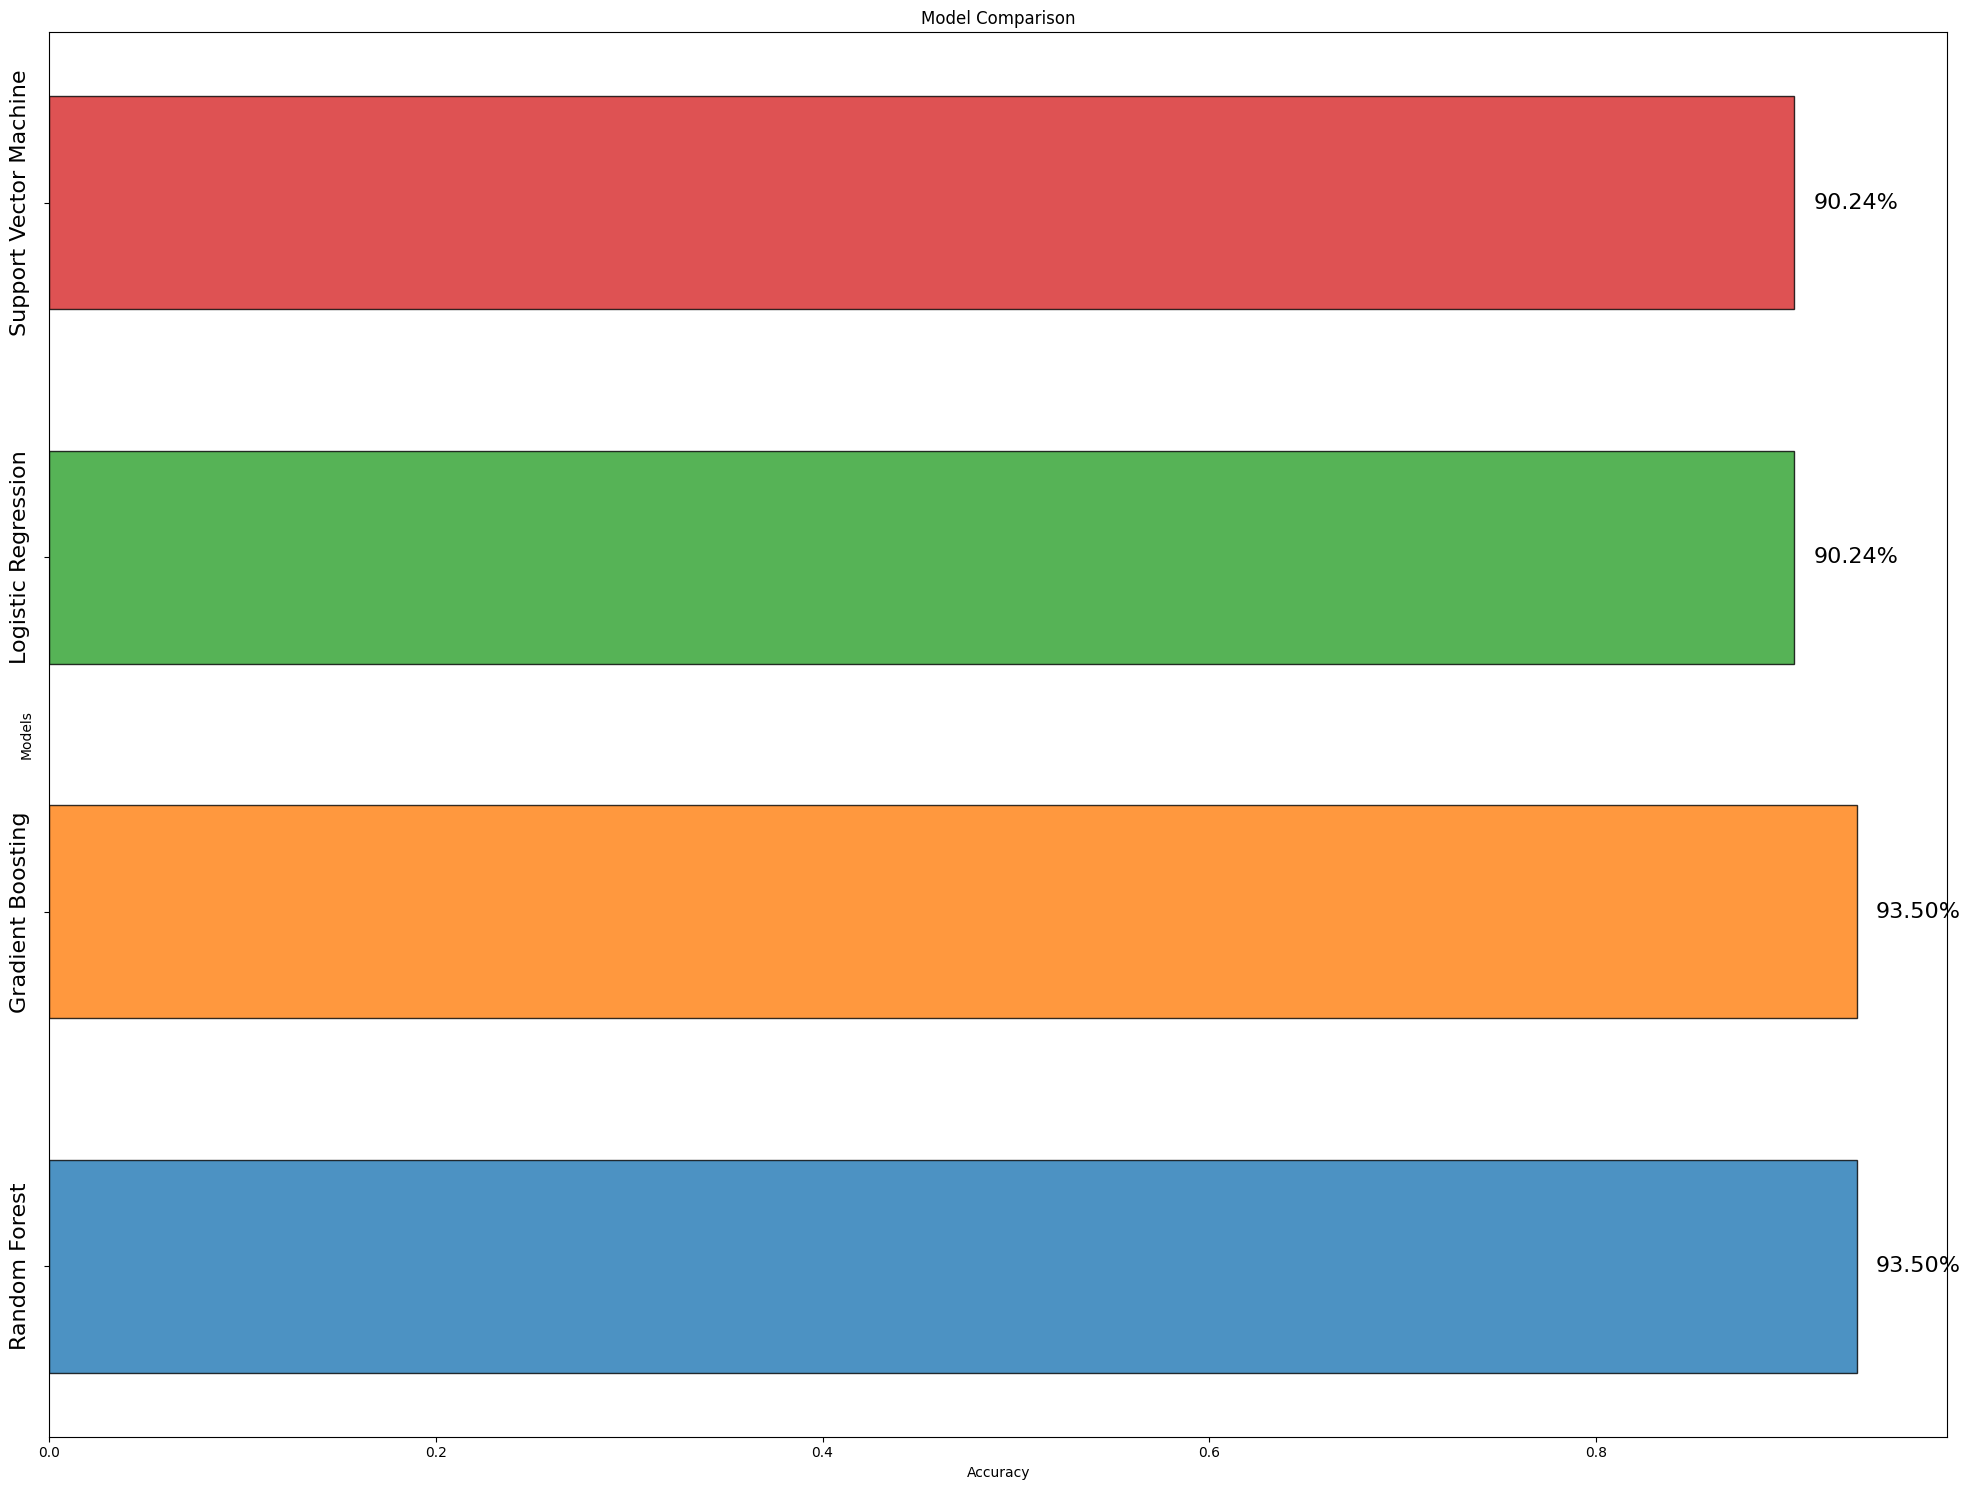

In [ ]:
# Sort accuracies in descending order
accuracies.sort(key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
names, values = zip(*accuracies)

# Set color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Add labels to the bars
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)

# Set axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')


# Adjust layout and save plot
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()


In [ ]:
# Fit best model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# get feature importances
importances = gb_model.feature_importances_
importances

array([4.19224193e-02, 4.12187747e-09, 7.53156691e-03, 7.86154817e-02,
       8.55019651e-02, 6.39784604e-01, 4.68164232e-02, 2.21880878e-03,
       1.15358339e-02, 4.17369279e-02, 3.62666019e-02, 8.06936364e-03])

In [ ]:
# get feature names
feature_names = X.columns
feature_names

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')

In [ ]:
# sort feature importances in descending order
indices = np.argsort(importances)[::-1]
indices

array([ 5,  4,  3,  6,  0,  9, 10,  8, 11,  2,  7,  1], dtype=int64)

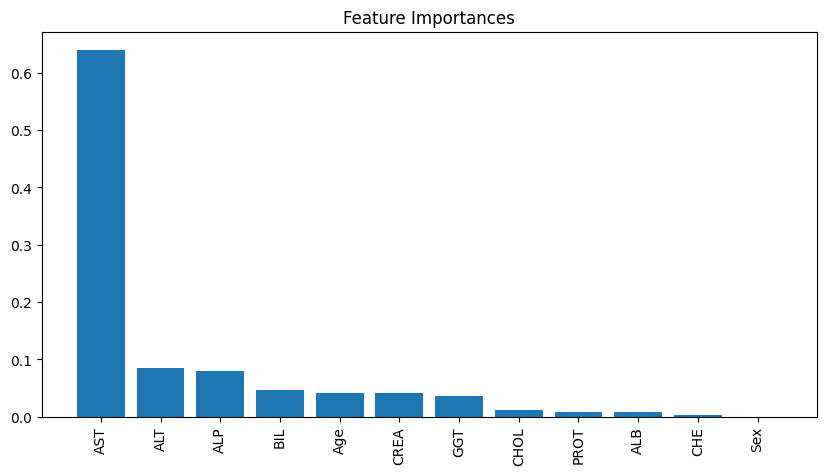

In [ ]:
# plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()

In [ ]:
import pickle
best_model=gb_model
# save the model to disk
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
